In [34]:
from utils_plots import roc_from_histos
from utils_plots import dijet_xsweights_dict
from utils_plots import assign_weights
from utils_plots import make_rocs
from utils_plots import make_efficiencies
from utils_plots import get_eff_score
from utils_plots import wp50_cut
from utils_plots import get_wp_tag
from utils_plots import tagger_scores
from utils_plots import scores_separation
from utils_plots import mass_sculpting
from utils_plots import pt_spectrum
from utils_plots import pt_bgrej
from utils_plots import pt_sigeff
from utils_plots import weights

import warnings
warnings.filterwarnings('ignore')

In [40]:
taggers = {}
tagger_files = {}
#tagger_files["LundNet_class"] = "/Users/mykola/Physics/LundTagger/LScores/scores_newclass.root"
#tagger_files["LundNet_adv"] = "/Users/mykola/Physics/LundTagger/LScores/scores_newclass_adv.root"
tagger_files["Lund_Classifier"] = "/Users/mykola/Physics/LundTagger/LScores/scores_weightclas.root"
tagger_files["LundNet_adv09"] = "/Users/mykola/Physics/LundTagger/LScores/scores_jsd09.root"
tagger_files["Lund_Class_w_adversarial"] = "/Users/mykola/Physics/LundTagger/LScores/scores_weightadv.root"
tagger_files["LundNet_adv17"] = "/Users/mykola/Physics/LundTagger/LScores/scores_adv17.root"
tagger_files["LundNet_adv026"] = "/Users/mykola/Physics/LundTagger/LScores/scores_adv_0.2619.root"
tagger_files["LundNet_adv022"] = "/Users/mykola/Physics/LundTagger/LScores/scores_adv_0.22406.root"
tagger_files["LundNet_adv059"] = "/Users/mykola/Physics/LundTagger/LScores/scores_adv_0.59639.root"


In [41]:
for t in tagger_files:
    taggers[t] = tagger_scores(t,tagger_files[t])

Lund_Classifier
signal ratio: 0.8496130031507896
bg ratio: 0.03633964435263435
LundNet_adv09
signal ratio: 0.8039842722554172
bg ratio: 0.1076013692731965
Lund_Class_w_adversarial
signal ratio: 0.7982464216335806
bg ratio: 0.09474813188505277
LundNet_adv17
signal ratio: 0.7352267343329837
bg ratio: 0.056882037754098703
LundNet_adv026
signal ratio: 0.8671862081040682
bg ratio: 0.0648821339725822
LundNet_adv022
signal ratio: 0.8298028941711276
bg ratio: 0.04895645818574824
LundNet_adv059
signal ratio: 0.8388478544462565
bg ratio: 0.0601238998432736


Warning in <TROOT::Append>: Replacing existing TH1: signalLundNet_adv026 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bgLundNet_adv026 (Potential memory leak).


In [42]:
for t in taggers:
    get_wp_tag(taggers[t],0.5)


****************************************
Minimizer is Minuit / Migrad
Chi2                      =    0.0147775
NDf                       =           78
Edm                       =  3.33393e-07
NCalls                    =          664
p0                        =     0.182246   +/-   0.0579192   
p1                        =     0.428598   +/-   0.0856574   
p2                        =     0.533273   +/-   0.0984401   
p3                        =  -0.00391953   +/-   0.000222921 
p4                        =     -263.545   +/-   66.2729     

****************************************
Minimizer is Minuit / Migrad
Chi2                      =    0.0171704
NDf                       =           78
Edm                       =  2.92116e-08
NCalls                    =         1025
p0                        =   -0.0895565   +/-   0.012094    
p1                        =    0.0188778   +/-   0.00258955  
p2                        =    0.0177135   +/-   0.00223084  
p3                        =    -0.

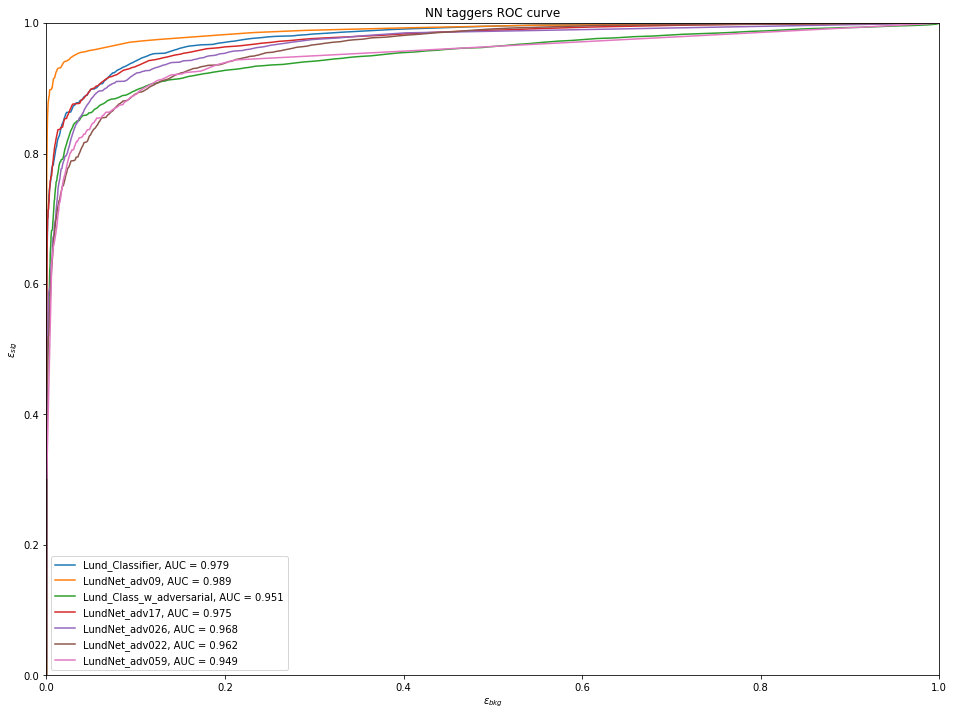

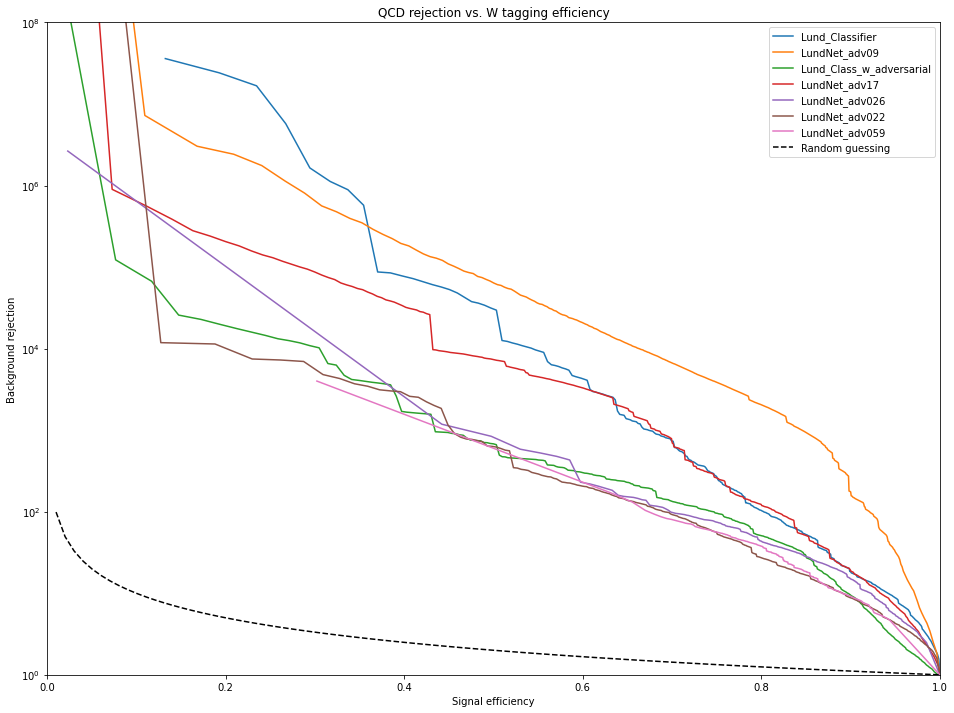

In [43]:
make_rocs(taggers)
make_efficiencies(taggers)

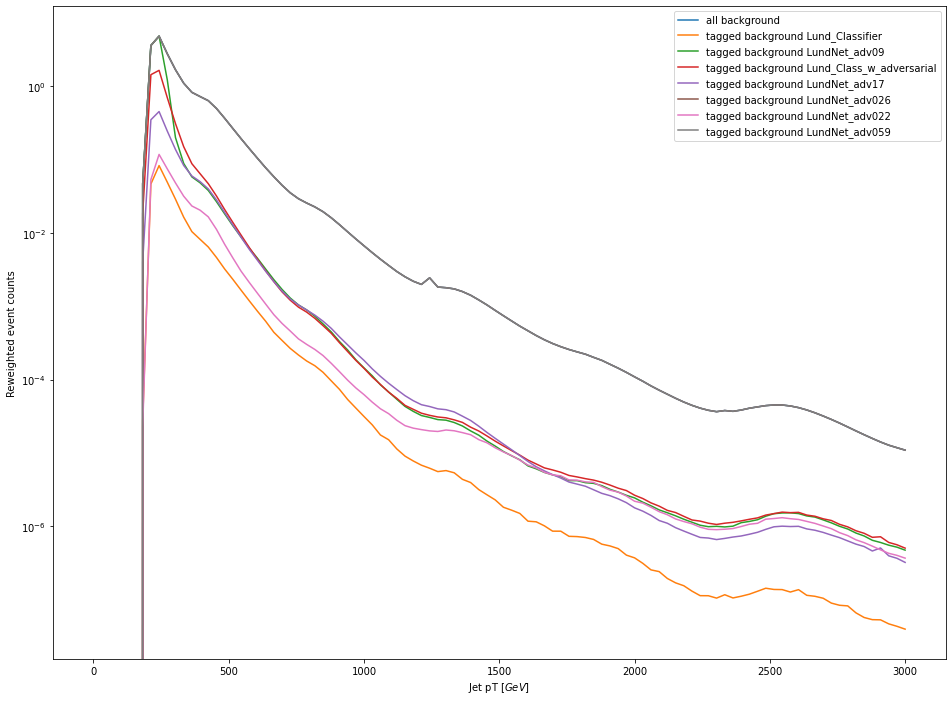

In [44]:
pt_spectrum(taggers)

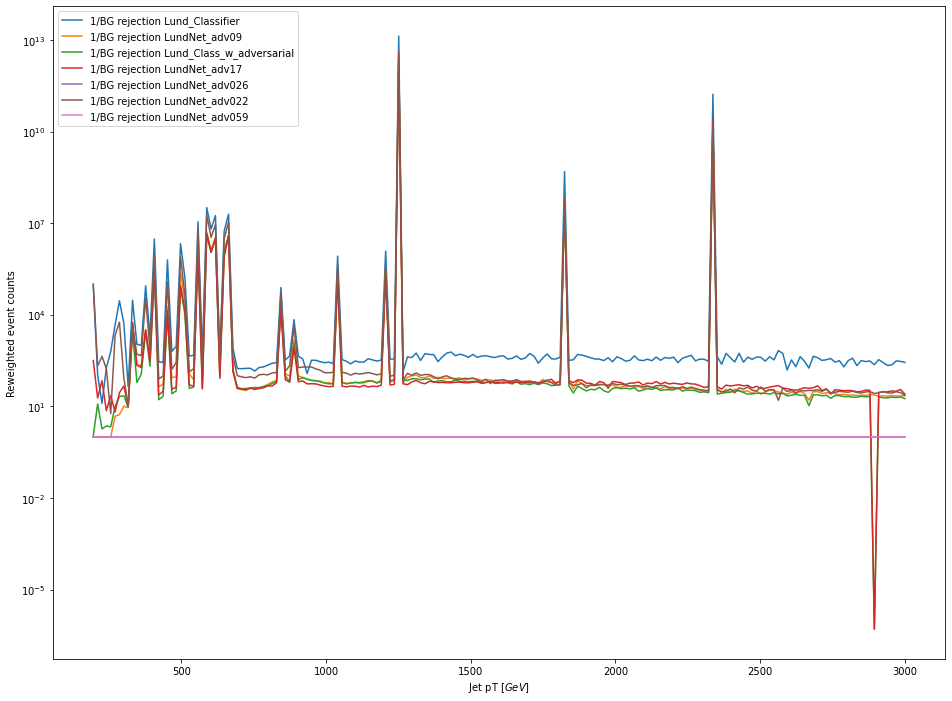

Warning in <TROOT::Append>: Replacing existing TH1: bg_total (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bg_LundNet_adv059 (Potential memory leak).


In [45]:
pt_bgrej(taggers)

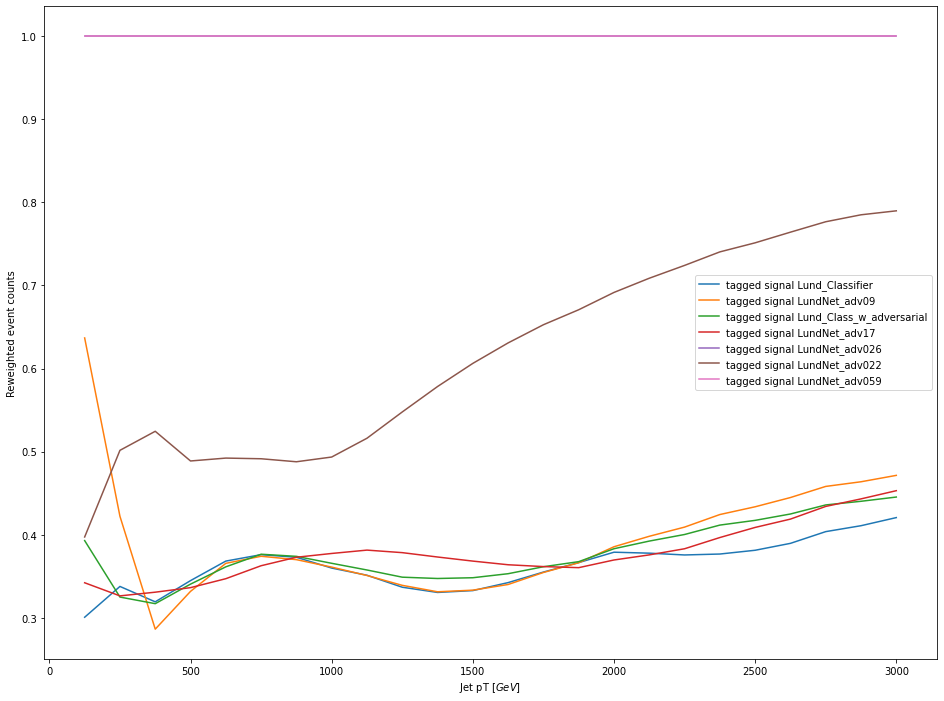

In [46]:
pt_sigeff(taggers)

In [47]:
def weights(tagger):
    plt.figure(figsize=[16,8])
    kwargs = dict(alpha = 0.75, bins = 50, density = True, stacked = True,range=(-1,5))

    plt.hist(tagger.signal["fjet_weight_pt_dR"],  ** kwargs, label="Signal")
    plt.hist(tagger.bg["fjet_weight_pt_dR"], ** kwargs, label="Background")
    plt.legend(fontsize=30)
    plt.show()

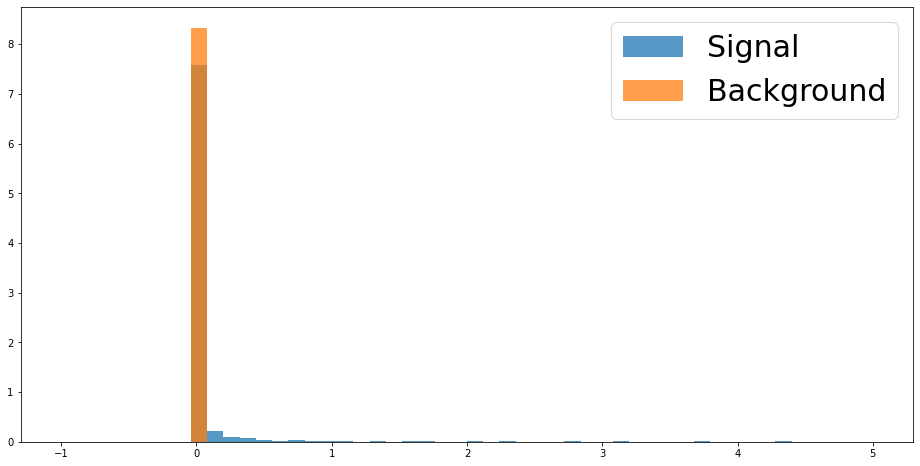

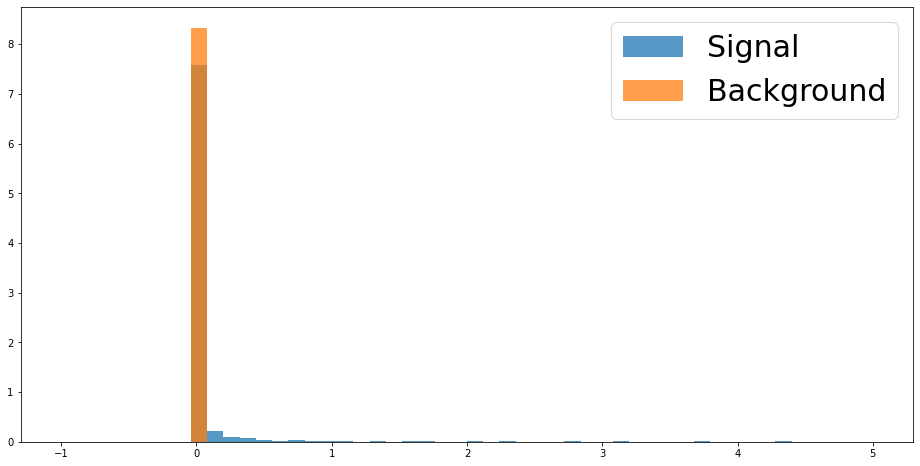

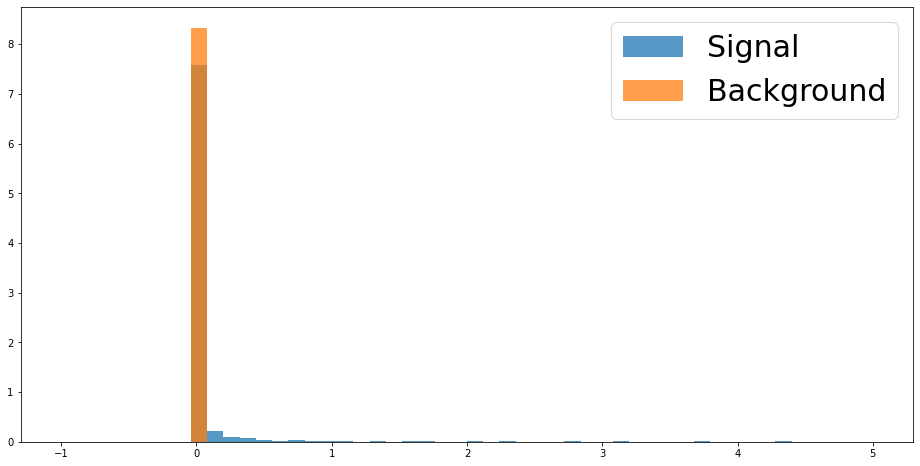

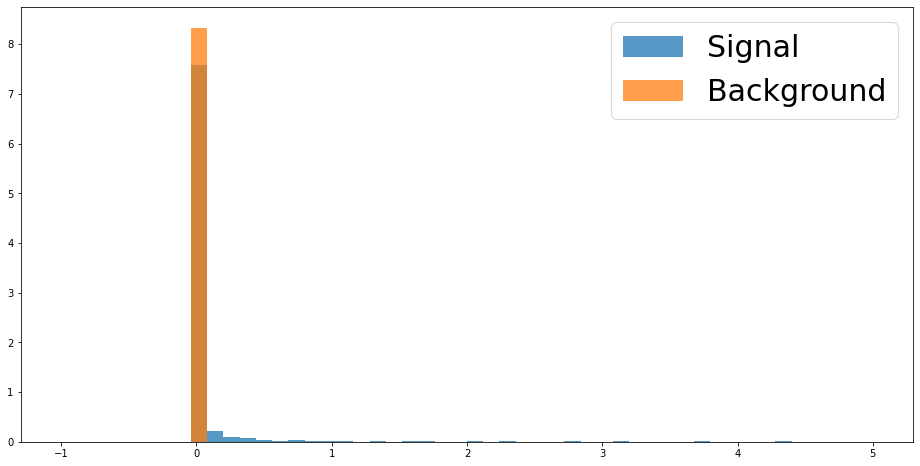

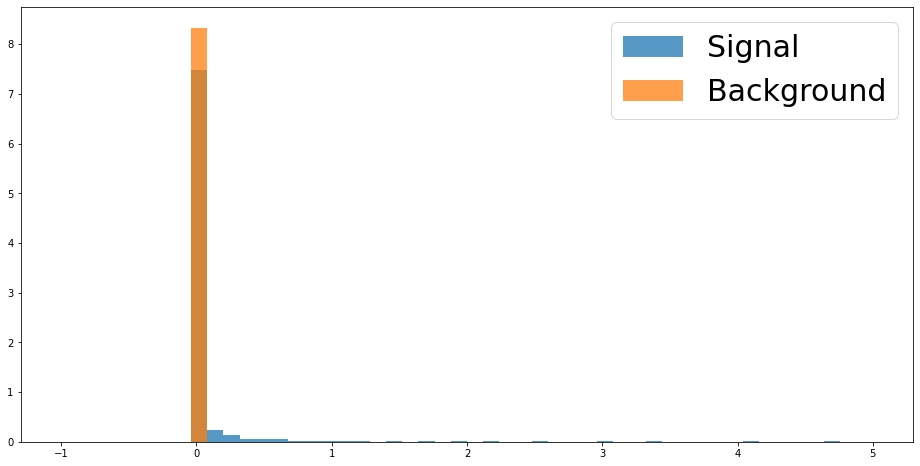

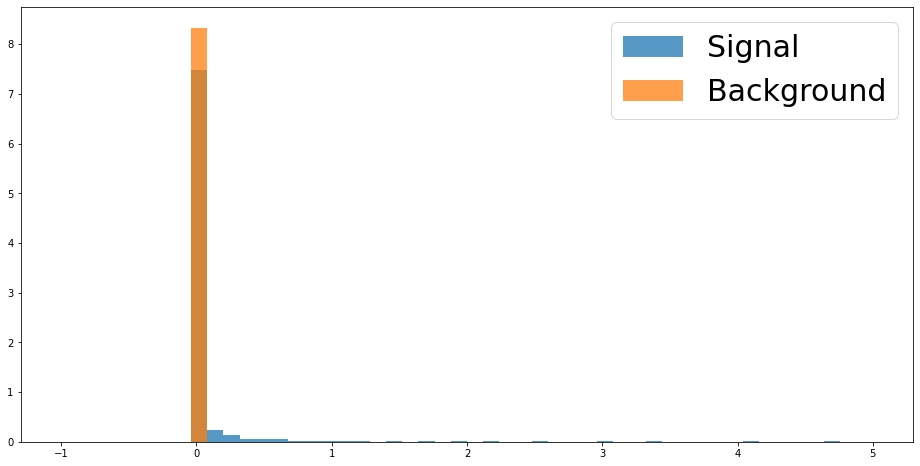

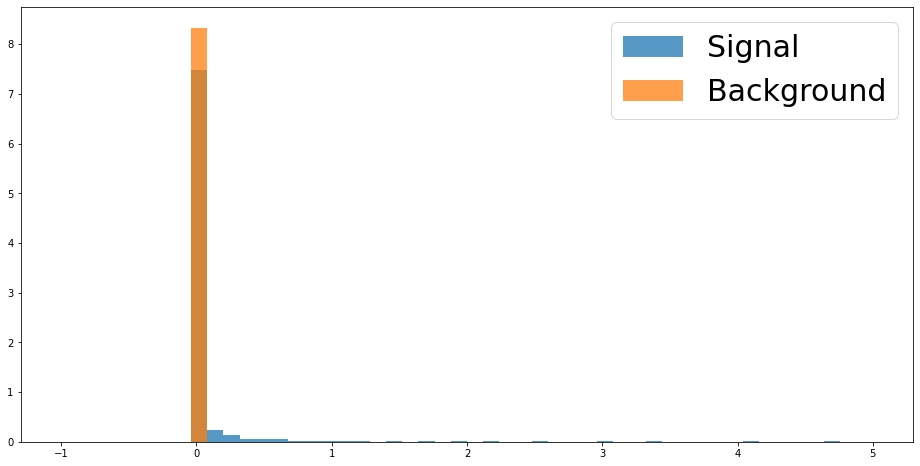

In [48]:
import matplotlib.pyplot as plt

for t in taggers:
    weights(taggers[t])

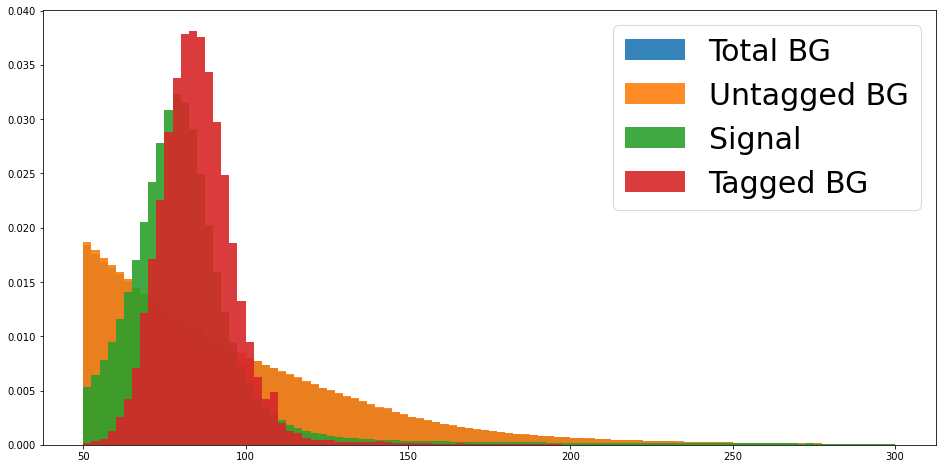

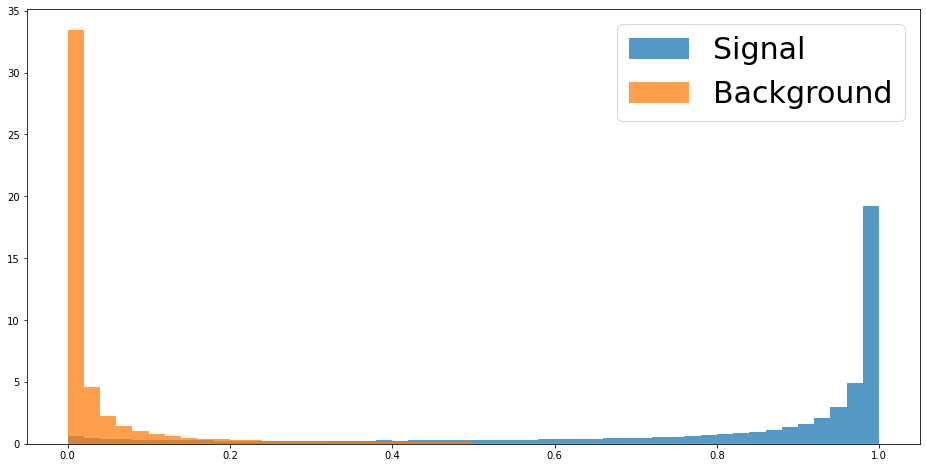

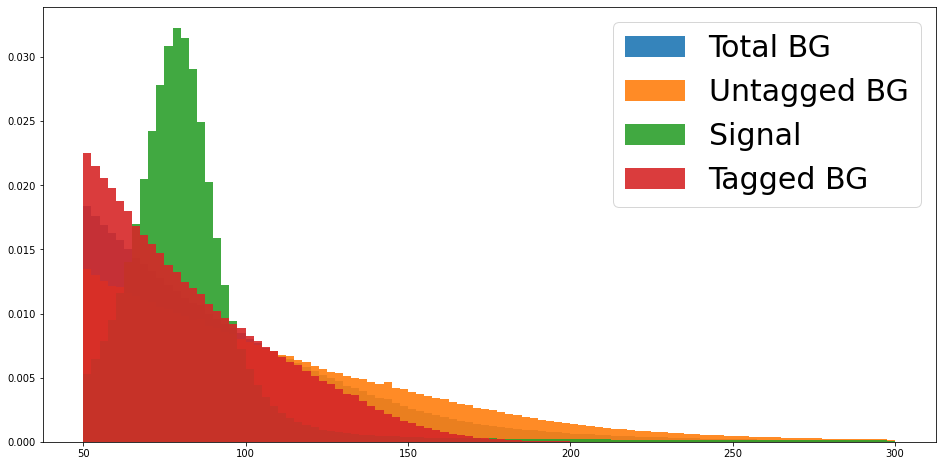

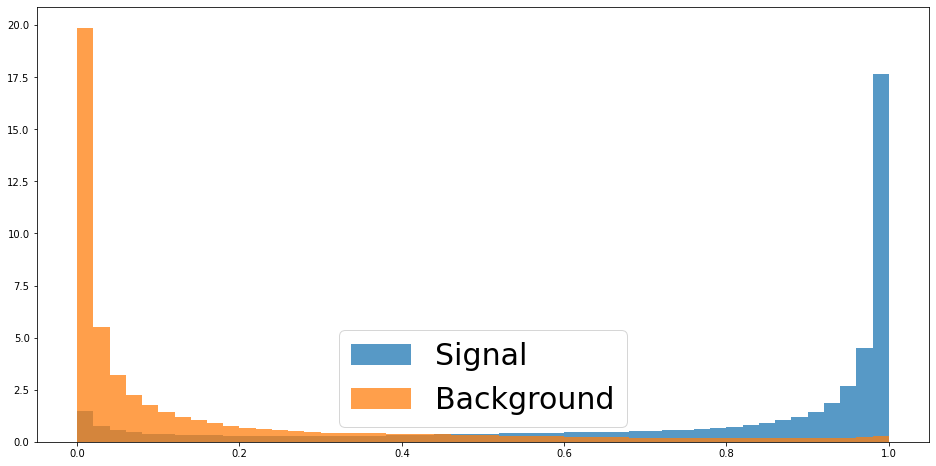

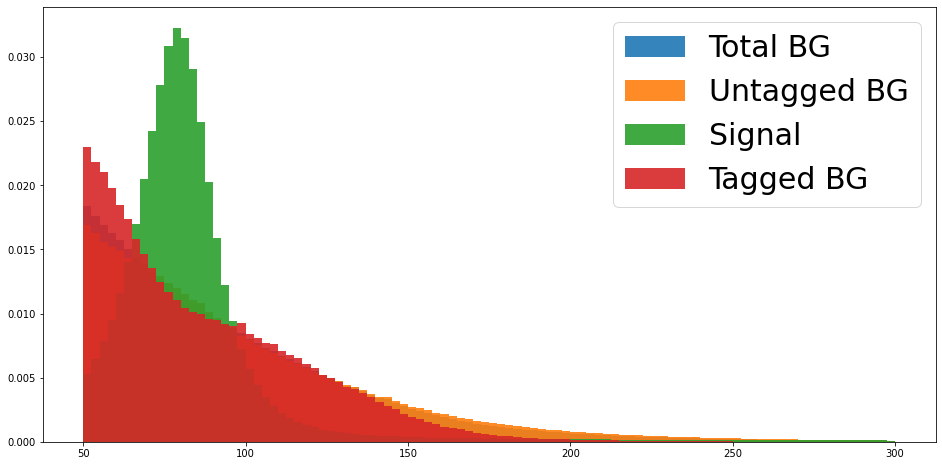

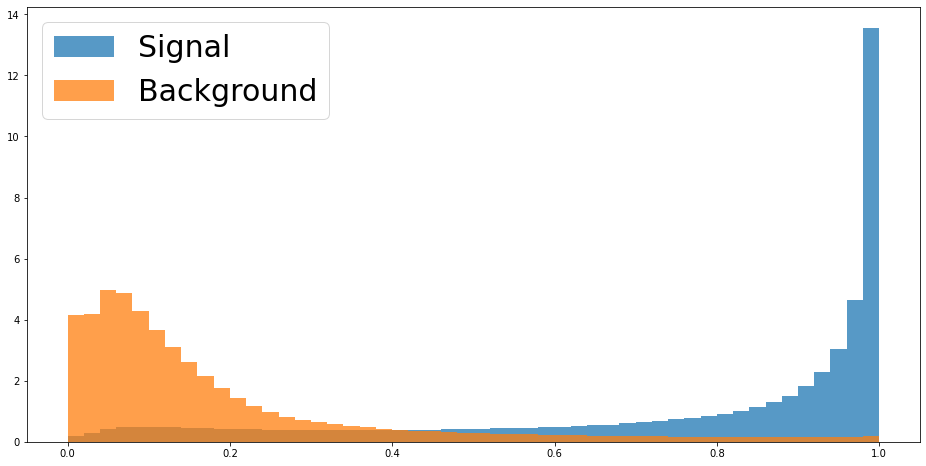

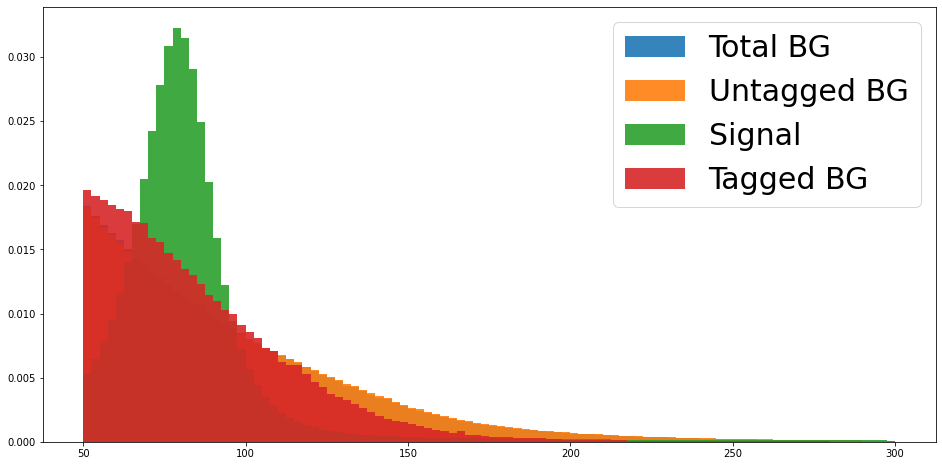

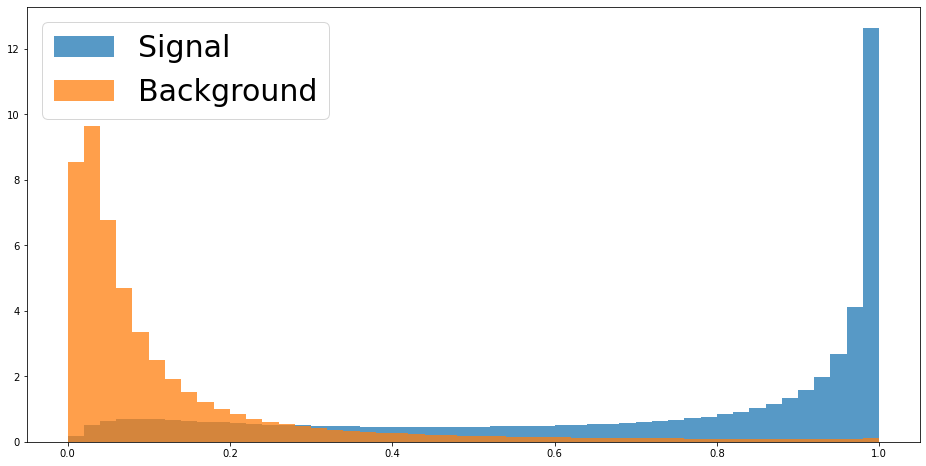

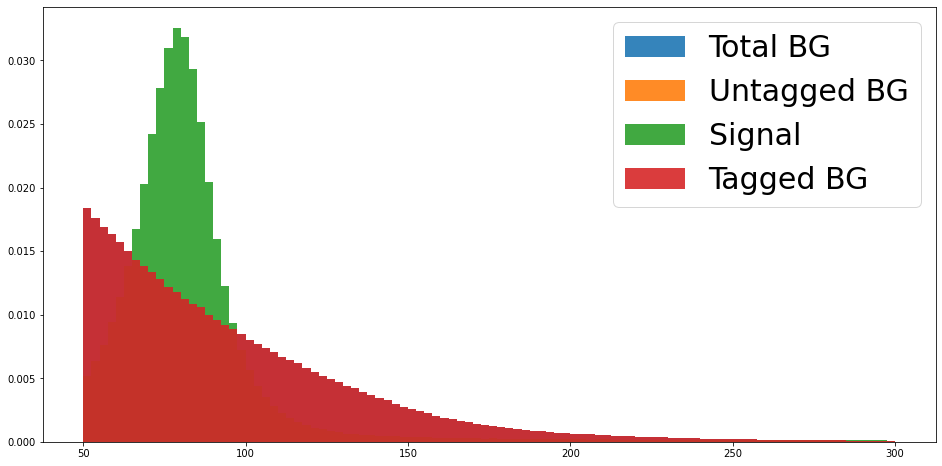

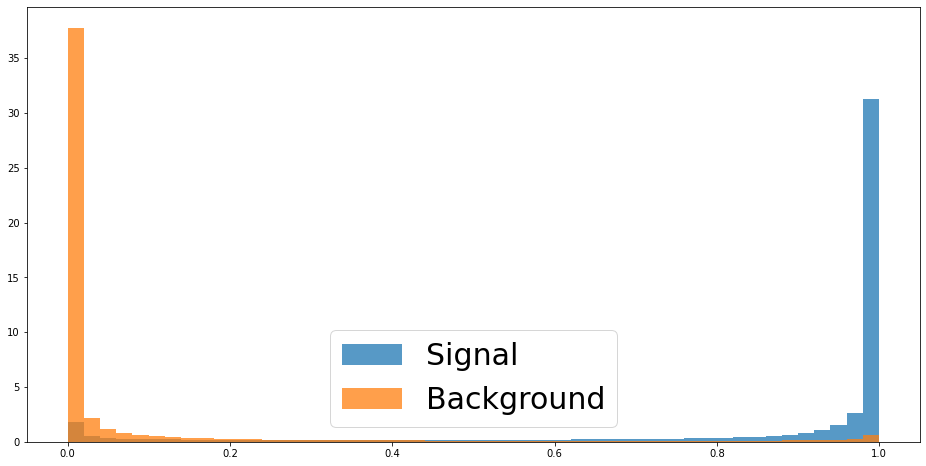

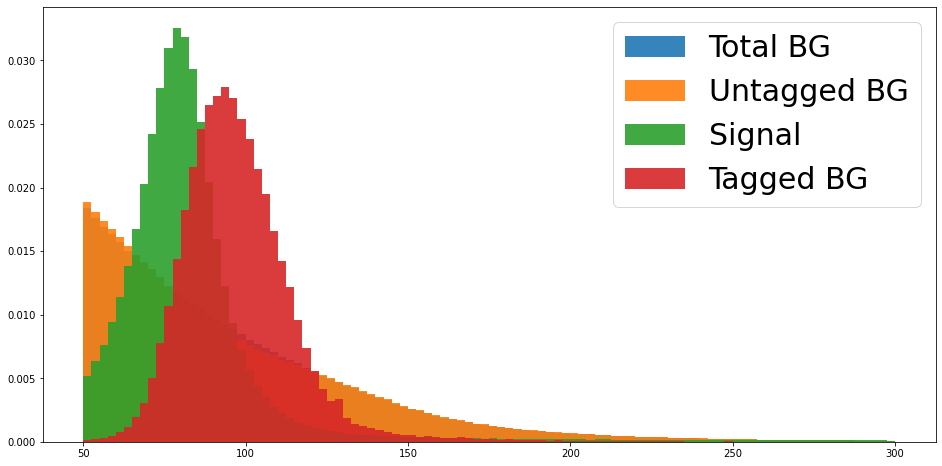

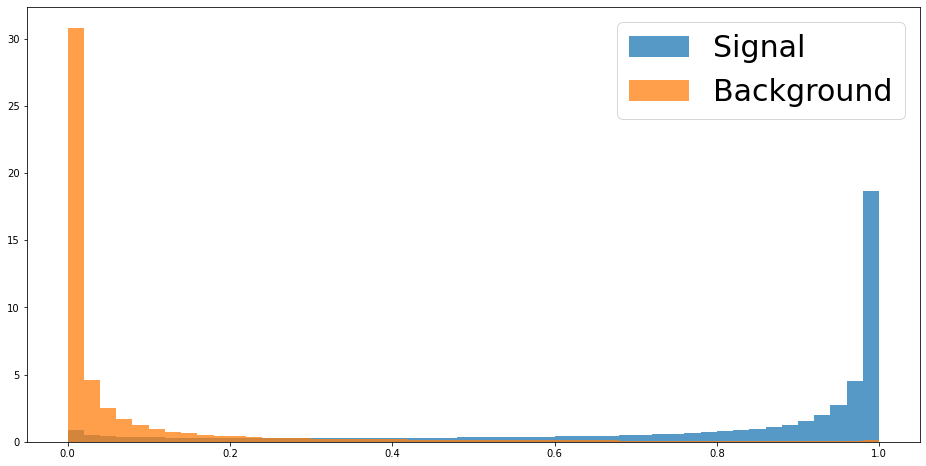

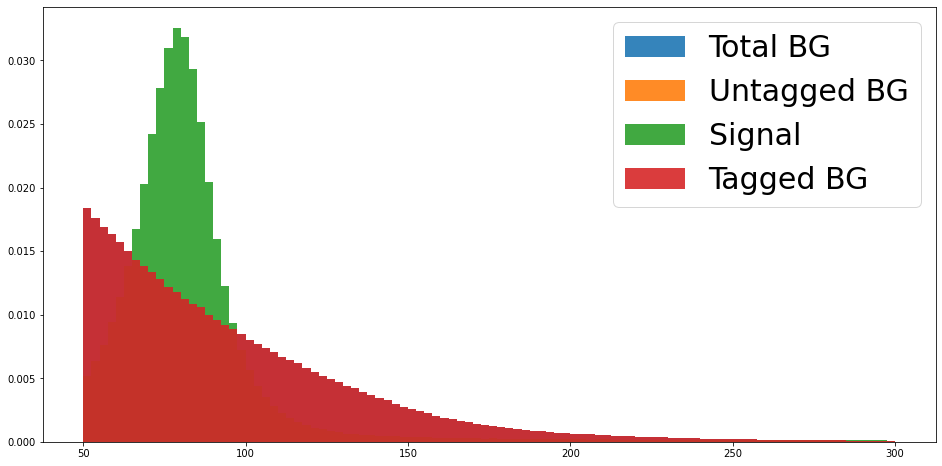

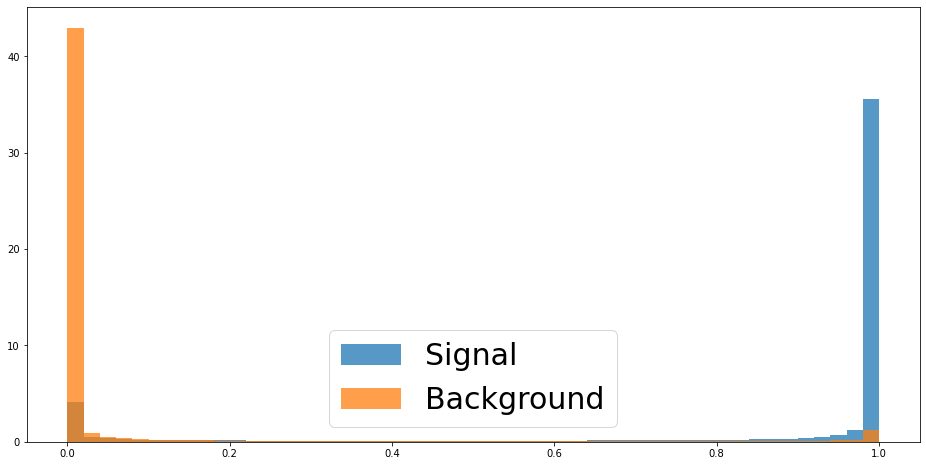

In [49]:
for t in taggers:
    mass_sculpting(taggers[t])
    scores_separation(taggers[t])